## Credit Card Fraud Detection

약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램


# Module Import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

필요한 라이브러리들을 불러옵니다.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


구글 Colab을 사용할 경우, 적절한 작업경로를 지정해줍니다.

# Data Load

In [3]:
df = pd.read_csv("/content/drive/My Drive/dataset/creditcard.csv", delimiter=',', dtype=np.float32)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


Pandas로 csv파일을 불러와서 확인해 줍니다. df라는 변수에 데이터가 제대로 저장되었는지 head 명령어를 통해 확인해 줍니다.

# Missing Value Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

불러온 데이터를 조금 더 구체적으로 살펴봅니다. 각 변수에 대해서 missing value가 존재하는지 확인합니다. 만약 missing value가 존재할 경우 count 컬럼에 missing value의 숫자가 기록됩니다. 이 데이터에서는 missing value가 존재하지 않음을 확인할 수 있습니다. 또한 데이터 타입과 메모리 사용량도 확인 가능합니다.

In [4]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

만약 missing value가 존재한다면, 몇개의 missing value가 존재하는지 확인해 줍니다. missing value의 존재를 확인했다면 해당 missing value가 존재하는는 row를 삭제하거나 적절한 값으로 missing value를 채워주도록 합니다. 여기서 적절한 값을 계산하는 방법은 여러가지가 존재할 수 있으며, 가장 간단하게는 평균이나 중간값을 사용할 수 있습니다.

# Correlation Visualize

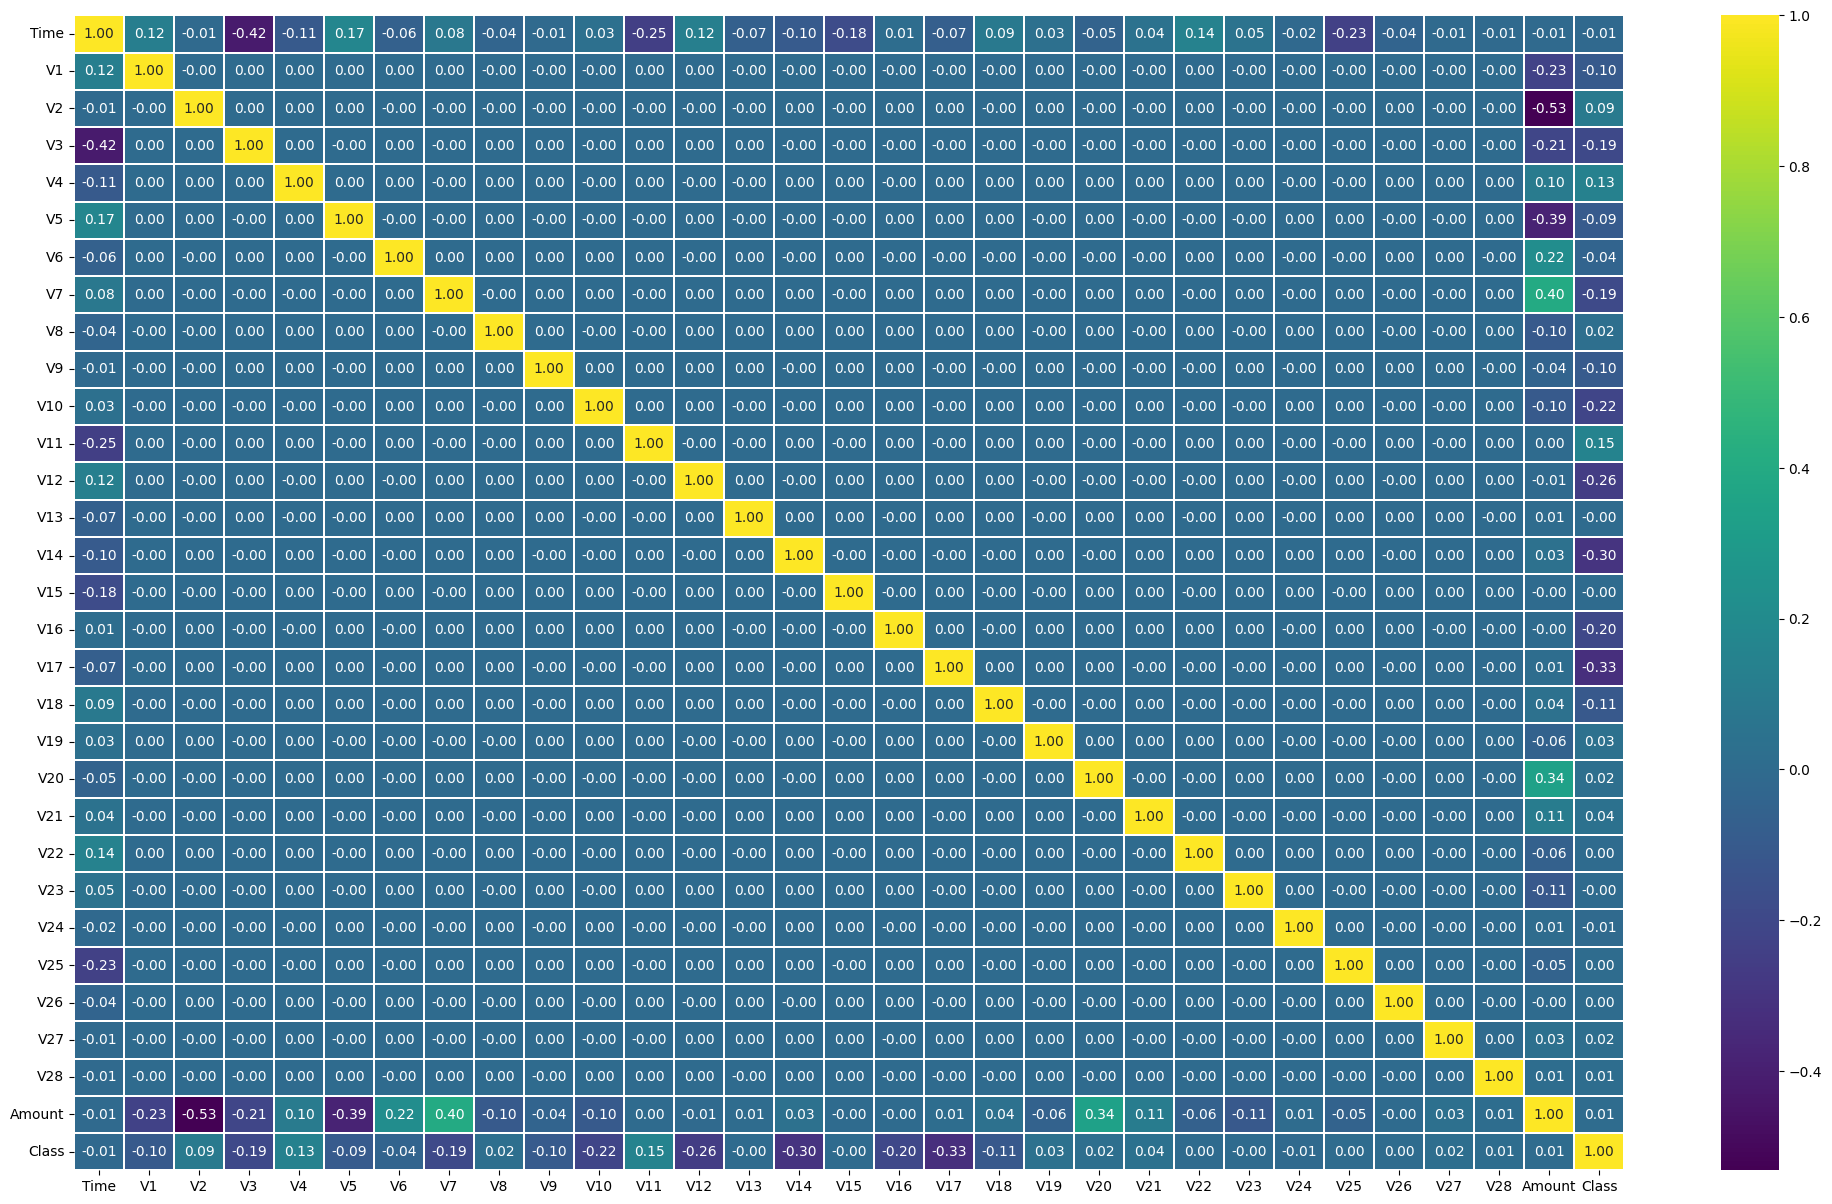

In [5]:
import seaborn
f, ax = plt.subplots(figsize = (25,15))
seaborn.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f", ax=ax, cmap="viridis")
plt.show()

Feature들 사이의 상관관계를 확인합니다. Credit card 데이터의 경우에는 이미 한번 PCA를 거친 데이터이기 때문에 Feature들 사이의 상관관계가 매우 낮게 나옵니다. 그러나 만약 Feature들 간의 상관관계가 높게 나오는 상황을 마주하게 된다면 VIF를 통해서 다중공선성을 확인해주는것이 좋습니다.

PCA에 대한 자세한 설명: https://angeloyeo.github.io/2019/07/27/PCA.html

# EDA (Exploaratory Data Analysis)
데이터의 전체적인 구조를 살펴봅니다.

In [6]:
print(df["Class"].value_counts())
count_classes = pd.value_counts(df["Class"], sort=True)
count_classes.head()
print()

print(df["Class"].value_counts(normalize=True))

0.0    284315
1.0       492
Name: Class, dtype: int64

0.0    0.998273
1.0    0.001727
Name: Class, dtype: float64


0.0 : 정상거래
1.0 : 이상거래

정상거래는 28만 4315건, 이상거래는 492건이 존재합니다.
전체 데이터셋에서 오직 0.0017%가 이상거래이므로 심각한 imbalance가 존재하는 dataset임을 파악할 수 있습니다. 그러므로 일반적인 상황에서 주로 사용되는 Accuracy를 사용해서 모델의 Performance를 측정하기 어렵다는 결론이 도출됩니다. 따라서 모델을 설계할 때 Precision, Recall, 그리고 F1 Score를 사용하도록 디자인 해줍니다.

Text(0.5, 1.0, 'Transaction Class Distribution')

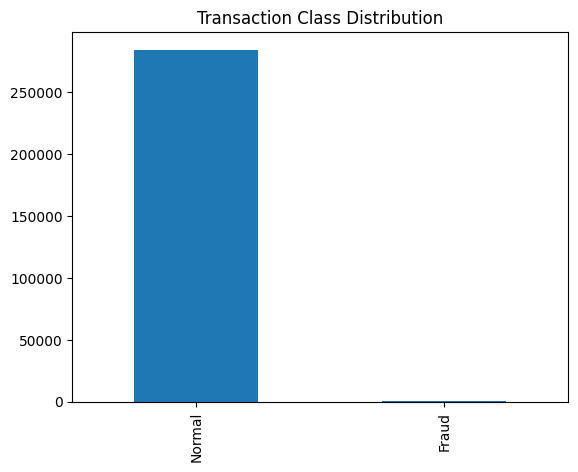

In [7]:
labels = ["Normal", "Fraud"]
count_classes.plot(kind="bar")
plt.xticks(range(2), labels)
plt.title("Transaction Class Distribution")

Data imabalance가 얼마나 심한지 시각화를 통해서 확인합니다.

In [8]:
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


Time 이라는 Feature는 단순히 신용카드 거래가 이루어진 순서를 기록한 것이기 때문에 분석에 크게 도움이 되지 않습니다. \
그러므로 데이터 테이블에서 배제시켜 줍니다.

In [9]:
x_data = df.iloc[:,0:-1].values
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


Feature들로 이루어진 x_data와, label을 나타내는 y_data로 원본 데이터를 분리시켜 줍니다. \
분리된 데이터는 앞으로 계산을 해주어야 하기 때문에 동일한 타입의 실수형 데이터로 저장합니다.

# Data Preprocessing - Normalize

In [10]:
scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)
print(x_data)

[[9.3519241e-01 7.6649040e-01 8.8136494e-01 ... 4.1897613e-01
  3.1269664e-01 5.8237929e-03]
 [9.7854203e-01 7.7006662e-01 8.4029853e-01 ... 4.1634512e-01
  3.1342265e-01 1.0470528e-04]
 [9.3521708e-01 7.5311762e-01 8.6814088e-01 ... 4.1548926e-01
  3.1191131e-01 1.4738923e-02]
 ...
 [9.9090487e-01 7.6407969e-01 7.8110206e-01 ... 4.1659316e-01
  3.1258485e-01 2.6421540e-03]
 [9.5420909e-01 7.7285570e-01 8.4958714e-01 ... 4.1851953e-01
  3.1524515e-01 3.8923896e-04]
 [9.4923186e-01 7.6525640e-01 8.4960151e-01 ... 4.1646636e-01
  3.1340083e-01 8.4464857e-03]]


데이터의 Scale에 따라서 결과가 왜곡되는 것을 방지하기 위해서 MinMaxScaler를 통해서 데이터가 0~1 사이의 값을 지니도록 조정해 줍니다.

# Logistic Regression

## Parameter Initilization

In [11]:
tf.random.set_seed(22)

W = tf.Variable(tf.random.normal([29,1], mean=0.0))
b = tf.Variable(tf.random.normal([1], mean=0.0))

W: 앞에는 input dimension, 뒤에는 output dimension으로 설정해야 합니다.\
b: output dimension과 동일하게 설정합니다.

## Hypothesis Define

In [12]:
def hypothesis(x):
  z = tf.matmul(x,W) + b
  sigmoid = 1 / (1 + tf.exp(-z))
  return sigmoid

Feature와 Label 사이의 관계를 정의하는 부분입니다.\
여기서는 이진분류 문제에 주로 사용되는 Logistic Regression을 hypothesis로 설정해 주었습니다.

## Cost Function Define

In [13]:
def cost_function(H, Y):
  cost = -tf.reduce_mean( Y*tf.math.log(H) + (1-Y)*tf.math.log(1-H))
  return cost

Cost Function 혹은 Loss Function으로 불립니다. \
여기서는 마찬가지로 이진분류에서 주로 사용되는 Cross Entropy를 cost function으로 설정해 주었습니다.

## Metric Define

In [14]:
def accuracy(hypo, label):
  predicted = tf.cast( hypo > 0.5, dtype = tf.float32)
  accuracyd = tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
  return accuracyd

실제 모델의 퍼포먼스를 측정하는 기준을 설정합니다. \
일반적으로 가장 많이 쓰이는 Accuracy를 우선은 설정해 줍니다.

## Hyper-parameter Setting

In [15]:
learning_rate = 0.0001
optimizer = tf.optimizers.SGD(learning_rate)

학습을 진행하기 위해서 우리가 지정해 주어야 하는 변수를 Hyper-parameter라고 합니다. \
대표적인 하이퍼 파라미터는 learning rate, optimizer, epochs, actvation function, number of layer, number of neuron 같은 것들이 존재합니다. \
지금은 딥러닝 모델을 사용하는 것이 아니기 때문에 Logistic Regression 학습에 필요한 learning rate와 optimizer만 설정해 주었습니다.

## Training

In [16]:
for step in range(400):
  with tf.GradientTape() as g:
    pred = hypothesis(x_data)
    cost = cost_function(pred, y_data)

    gradients = g.gradient(cost, [W,b])

  optimizer.apply_gradients(zip(gradients, [W,b]))

  if step % 200 == 0:
    print(f"step: {step}, loss: {cost.numpy()}")

w_hat = W.numpy()
b_hat = b.numpy()

step: 0, loss: 0.015813229605555534
step: 200, loss: 0.015805760398507118


Backpropagation을 통해서 최적의 W와 b를 계속해서 업데이트 해줍니다. \
최종적으로 업데이트된 값을 w_hat과 b_hat에 저장합니다.

## Performance

In [ ]:
acc = accuracy(hypothesis(x_data), y_data).numpy()
print(f"Accuracy: {acc}")

Accuracy: 0.9982725381851196


99.83%의 상당히 높은 Accuracy를 보입니다. \
그러나 위에서 살펴본 바에 의하면 dataset이 매우 imbalance 했으므로, Accuracy는 모델을 평가하는 적절한 metric이 될 수 없습니다. \
그러므로 Precision과 Recall의 측면에서 모델을 다시한번 평가해 봅니다.

## Precision, Recall, F1 Score

In [ ]:
# metric
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
predicted_x = tf.cast( hypothesis(x_data) > 0.5, dtype = tf.float32)

In [ ]:
print("Accuracy = ", accuracy_score(predicted_x, y_data))
print("Report = \n", classification_report(predicted_x, y_data))

Accuracy =  0.9982725143693799


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report = 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


대안적인 metric의 관점에서 Logisic Regression 모델을 평가해 봤을 때, Fraud transaction을 거의 잡아내지 못하는 것을 볼 수 있습니다. \
그러므로 다른 모델을 통해서 접근할 필요가 있습니다. \


* Precision: 모델이 True라고 분류한 것 중에서 실제 True가 차지하는 비중
* Recall: 실제 True 중에서 모델이 True라고 분류한 데이터의 비중
* F1 score: Precision과 Recall의 조화평균